Laboratorio #2 - Modulacion por Amplitud

TAREA # 1 
Construir un sistema básico AM de tipo DSC-SC, incluyendo la etapa de modulación y 
demodulación, puede asumir condiciones óptimas, esto es no ruido o pérdidas o modificaciones 
en frecuencia o fase. 

1- Se recomienda crear una función para la modulación y otra para la demodulación. 
2- Utilice sincronización coherente. 
3- Puede asumir un canal óptimo sin pérdidas entre ambos bloques. 
1- Grafique todas las funciones y salidas involucradas, tanto en el tiempo como en la 
frecuencia. Sea ordenado en la forma en que lo presente en la notebook. Describa lo 
que observa en cada una de ellas. 
4- Para el experimento, considere una señal de tono (información) tipo: 
𝑚(𝑡) ó 𝑓(𝑡) = cos (2𝜋𝑓௠𝑡), de forma que NO se incurra en sobre-modulación. 
5- Realice un análisis completo de los resultados obtenidos, en cada parte funcional del 
sistema de comunicación AM DSB-SC.

Se importan las librerias y funciones que serán necesarias. Asimismo, se crea un funcion que crea señales cosenoidales con amplitud, frecuencia, fase y offset variables. Tambien se define la cantidad de puntos y el lapso en el cual se graficarán las funciones en el tiempo, y con esto se define el eje x, tiempo, para la graficacion de señales.
Se crea la señal moduladora, una señal cosenoidal con una amplitud de 1.5, frecuencia de 60 Hz y offset de 2.

Para graficar en el dominio de la frecuencia se debe poder realizar la transformada rapida de Fourier (FFT), para esto se crea una funcion que realiza la FFT y grafica el resultado. Esta funcion toma la señal de entrada, un limite para graficar en la frecuencia y cada cuanto dibuja una division sobre el eje x.
Ahora se procede a graficar en la frecuencia la señal moduladora.
Se crea la señal portadora, una señal senoidal de amplitud 1 y frecuencia de 300 Hz.
Se procede a graficar la señal portadora en el domino de la frecuencia.

In [97]:
#Bibliotecas y funciones
#Se importan las bibliotecas mas importantes
import matplotlib.pyplot as plt
import numpy
from numpy import arange,sin,cos,pi, linspace
from scipy.fft import fft, fftfreq
from scipy.signal import butter, lfilter, freqz

#Definicion de funciones a utilizar
#Funcion para crear una señal cosenoidal
def cosenoidal(f,A,Offset=0, Theta=0):
    m = A*cos(2*pi*f*t + Theta) + Offset
    return m

#Funcion para realizar un FFT de una señal
def plotfft(func):
    F = fft(func)
    tf = fftfreq(samples, T/samples)
    return tf,F

#Funciones para filtro basa bajas
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

#Funcion de modulación
def AMSC(m,c):
    s = m*c
    return s

#Funcion de desmodulacion
def DemAMSC(s,c,m):
    sc = s*c
    return sc

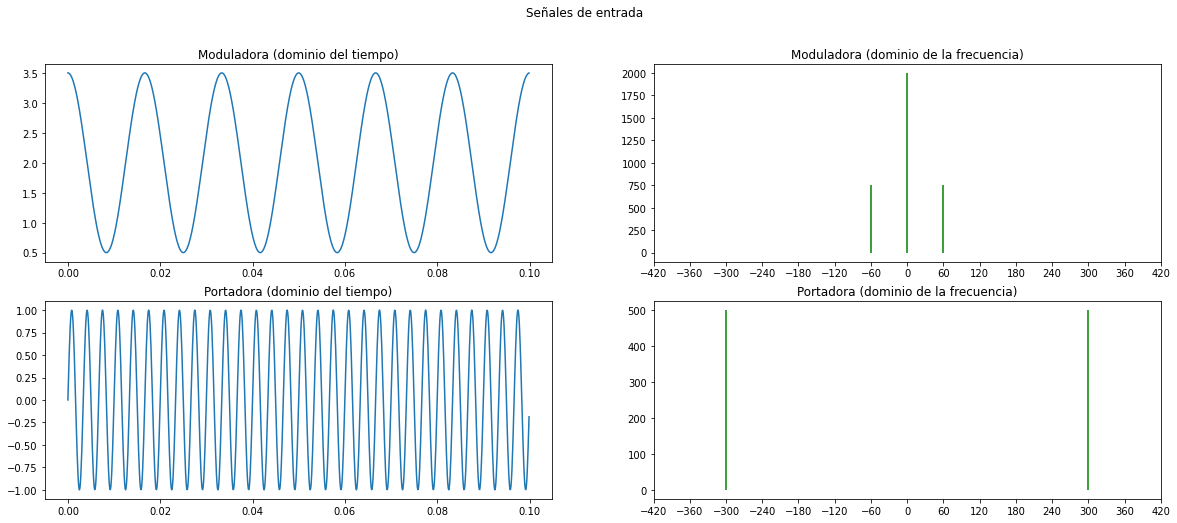

In [98]:
#Señales de entrada

#Numero de puntos y duracion
samples = 1000 
T = 0.1

#Espacio temporal
t = linspace(0, T, samples, endpoint=False)

#Señales iniciales:
#Moduladora
#Frecuencia de 60Hz, Amplitud de 1.5 y Offset de 2
fm = 60
Am = 1.5
Offm = 2
m = cosenoidal(fm,Am,Offm)
Mtf, M = plotfft(m)

#Protadora
#Frecuencia de 300Hz y Amplitud de 1
fc = 300
Ac = 1
c = cosenoidal(fc,Ac,0,-pi/2)
Ctf, C = plotfft(c)

#Plot de las señales de entrada
fig1, axs = plt.subplots(2,2,figsize=(20,8))
fig1.suptitle('Señales de entrada')
axs[0,0].plot(t,m)
axs[0,0].set_title('Moduladora (dominio del tiempo)')
axs[0,1].set(xlim=(-100,100),xticks=(range(-420,480,60)))
axs[0,1].vlines(Mtf,0,numpy.abs(M),color='g')
axs[0,1].set_title('Moduladora (dominio de la frecuencia)')
axs[1,0].plot(t,c)
axs[1,0].set_title('Portadora (dominio del tiempo)')
axs[1,1].set(xlim=(-400,400),xticks=(range(-420,480,60)))
axs[1,1].set_title('Portadora (dominio de la frecuencia)')
axs[1,1].vlines(Ctf,0,numpy.abs(C),color='g')
plt.show()

Para realizar la modulacion AM DSB-SC se crea una funcion que toma como entrada la señal moduladora y la señal portadora, las multiplica y grafica el resultado, incluyendo la señal modulada y las envolventes.

Se grafica la señal modulada en el domino de la frecuencia.

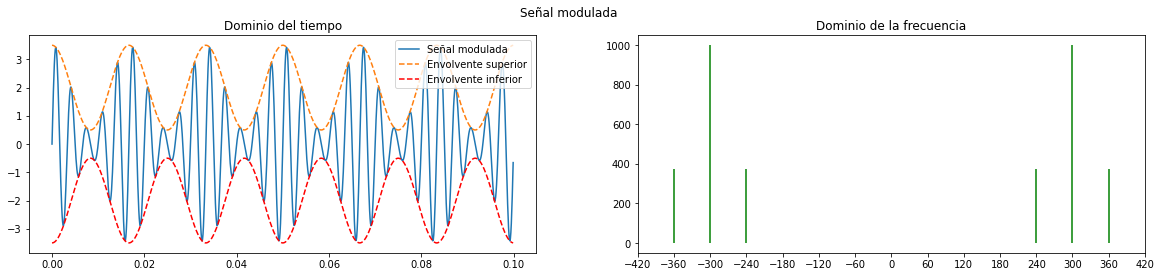

In [99]:
#Modulación de AM DSB-SC, señal modulada s

#Señal modulada
s = AMSC(m,c)
Stf, S = plotfft(s)

#Plot de la señal modulada
fig2, axs = plt.subplots(1,2,figsize=(20,4))
fig2.suptitle('Señal modulada')
axs[0].plot(t,s)
axs[0].plot(t,m,'--')
axs[0].plot(t,-m, '--' , color='r')
axs[0].legend(["Señal modulada", "Envolvente superior", "Envolvente inferior"])
axs[0].set_title('Dominio del tiempo')
#axs[0].grid()
axs[1].set(xlim=(-100,100),xticks=(range(-420,480,60)))
axs[1].vlines(Stf,0,numpy.abs(S),color='g')
axs[1].set_title('Dominio de la frecuencia')
#axs[1].grid()
plt.show()


La desmodulacion se realiza mediante una funcion creada, la cual recibe 3 señales, la señal modulada, la señal portadora para desmodulacion y la señal moduladora. Esta funcion desmodula la señal modulada y grafica el resultado junto con la señal moduladora.

Se grafica señal desmodulada en el dominio de la frecuencia.
Como se observa anteriormente, debido al proceso de modulacion, a la señal modulada se le añaden componentes de alta frecuencia, para eliminarlos se debe aplicar un filtro pasabajas. Es por esto que se hace una funcion que aplique un filtro pasabajas Butterworth a la señal entrante, se debe indicar la frecuencia de corte y el orden del filtro.
Se aplica dicho filtro a la señal modulada, con una frecuencia de corte de 100 Hz y se grafica el resultado. Donde ahora si, se puede comparar con la señal moduladora.
Se grafica la señal resultante en el dominio de la frecuencia para ser comparada con la señal moduladora en el dominio de la frecuencia.

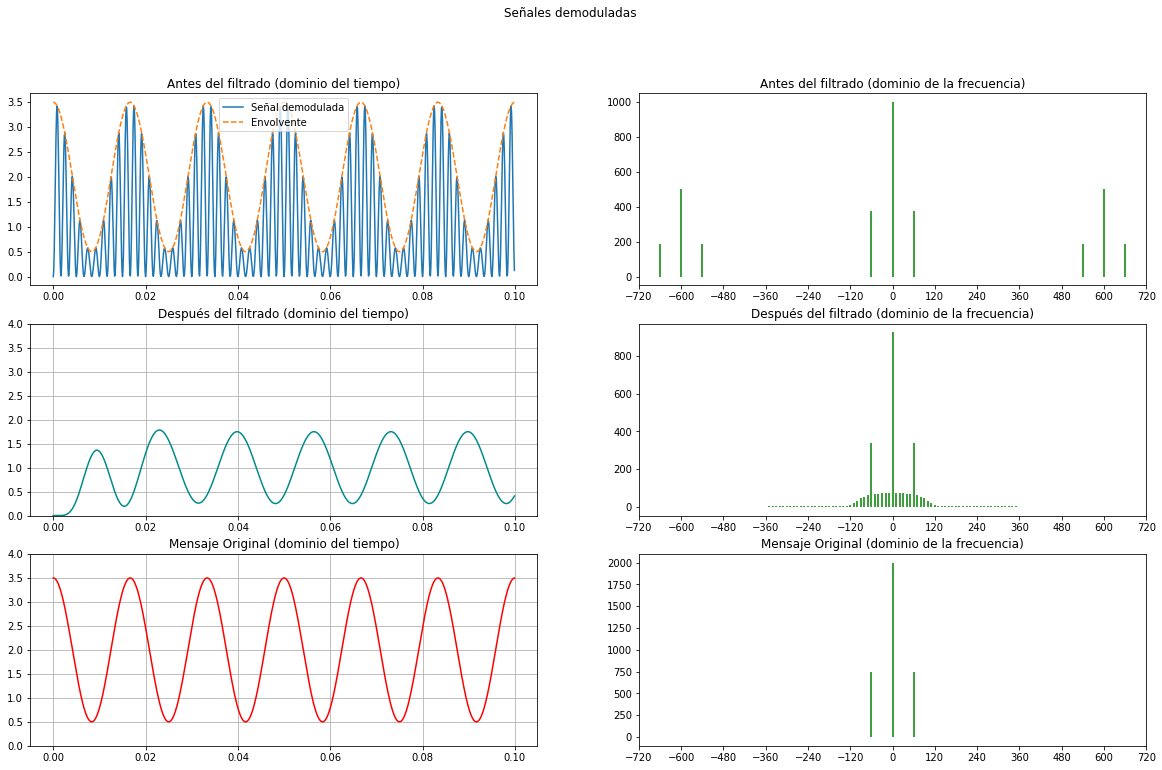

In [103]:
#Desmodulación de AM DSB-SC, señal demodulada sc

#Señal desmodulada
sc = DemAMSC(s,c,m)
SCtf, SC = plotfft(sc)

#Señal desmodulada filtrada de orden 6, y frecuencia de corte de 100Hz
order = 6
fs = (T/samples)**-1
cutoff = 100
md = butter_lowpass_filter(sc, cutoff, fs, order)
MDtf,MD = plotfft(md)

#Plot de la señal desmodulada antes y despues del filtrado
fig1, axs = plt.subplots(3,2,figsize=(20,12))
fig1.suptitle('Señales demoduladas')
axs[0,0].plot(t,sc)
axs[0,0].set_title('Antes del filtrado (dominio del tiempo)')
axs[0,0].plot(t,m,'--')
axs[0,0].legend(["Señal demodulada", "Envolvente"])

axs[0,1].set(xlim=(-100,100),xticks=(range(-720,780,120)))
axs[0,1].vlines(SCtf,0,numpy.abs(SC),color='g')
axs[0,1].set_title('Antes del filtrado (dominio de la frecuencia)')

axs[1,0].plot(t,md,color='darkcyan')
axs[1,0].set(ylim=(0,4))
axs[1,0].grid()
axs[1,0].set_title('Después del filtrado (dominio del tiempo)')

axs[1,1].set(xlim=(-400,400),xticks=(range(-720,780,120)))
axs[1,1].set_title('Después del filtrado (dominio de la frecuencia)')
axs[1,1].vlines(MDtf,0,numpy.abs(MD),color='g')

axs[2,0].plot(t,m, color='r')
axs[2,0].set(ylim=(0,4))
axs[2,0].grid()
axs[2,0].set_title('Mensaje Original (dominio del tiempo)')

axs[2,1].set(xlim=(-100,100),xticks=(range(-720,780,120)))
axs[2,1].vlines(Mtf,0,numpy.abs(M),color='g')
axs[2,1].set_title('Mensaje Original (dominio de la frecuencia)')
plt.show()


TAREA # 2 
Usando como base el sistema básico AM de tipo DSC-SC, construido en la sección anterior, 
introduzca una nueva señal de portadora en el bloque demodulador, de manera que pueda 
introducir errores controlados de ∆𝜔 y 𝜃଴.

Para esto se utilizaran señales similares a las del ejercicio anterior, solo que en este caso se modificara la portadora utilizada para la desmodulacion con un cambio en la frecuencia y la fase. La señal moduladora será la misma, una señal cosenoidal con amplitud de 1, frecuencia de 60 Hz y un offset de 2 para evitar sobremodulacion. De igual forma con la señal portadora para modulacion, que será igual a la portadora del ejericio 1.

In [101]:
c_Mod = cosenoidal(fc,Ac,0,-pi/2)

Se grafica en el dominio de la frecuencia la señal portadora para modulacion.

In [102]:
Ctf_Mod, C_Mod = plotfft(c_Mod,400,100)

TypeError: plotfft() takes 1 positional argument but 3 were given

Se define el delta de frecuencia y el delta de fase para la señal portadora para desmodulacion, tal que el cambio en la frecuencia es de -75 Hz y el cambio en la fase es de 2pi/3. Para apreciar mejor los efectos de los cambios en la frecuencia y fase entre la señal portadora de desmodulacion y modulacion, se utilizaran dos señales para la desmodulacion, una con cambios en la frecuencia y otra con cambios en la fase. Primero se crea la portadora para desmodulacion con cambios en la frecuencia.

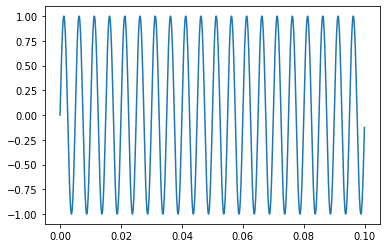

In [ ]:
dfreqc = -100
c_DesMod_dfreq = cosenoidal(fc+dfreqc,Ac,0,-pi/2)

Se grafica en el dominio de la frecuencia la señal portadora para desmodulacion con cambio en la frecuencia.

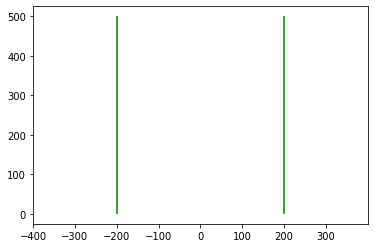

In [ ]:
Ctf_DesMod_dfreq, C_DesMod_dfreq = plotfft(c_DesMod_dfreq,400,100)

Se procede a crear la señal portadora para desmodulacion con cambios en la fase.

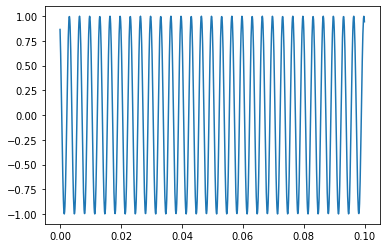

In [ ]:
dthetac = 2*pi/3
c_DesMod_dtheta = cosenoidal(fc,Ac,0,-pi/2+dthetac)

Se grafica en el dominio de la frecuencia la señal portadora para desmodulacion con cambios en la fase.

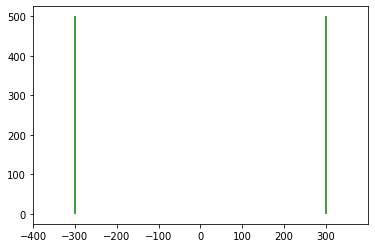

In [ ]:
Ctf_DesMod_dtheta, C_DesMod_dtheta = plotfft(c_DesMod_dtheta,400,100)

Se procede a realizar la modulacion AM DSB - SC.

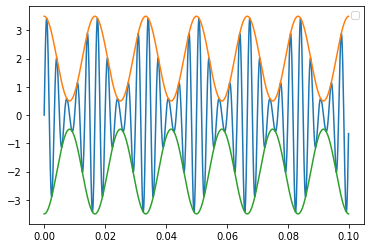

In [ ]:
s_2 = AMSC(m,c_Mod)

Se grafica la señal modulada en el dominio de la frecuencia.

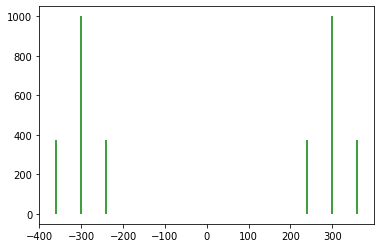

In [ ]:
Stf_2, S_2 = plotfft(s_2,400,100)

Ahora se procede a realizar la desmodulacion, primero se utilizara la señal portadora con cambios en la frecuencia.

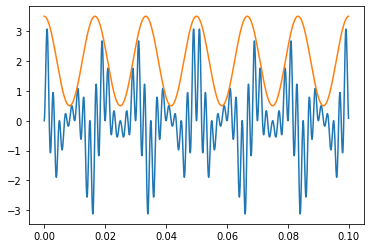

In [ ]:
sc_dfreq = DemAMSC(s_2,c_DesMod_dfreq,m)

Se aplica un filtro pasabajas con una frecuencia de corte de 100 Hz a la señal desmodulada para poder apreciar mejor las diferencias y efectos producto de señales portadoras con diferentes frecuencias.

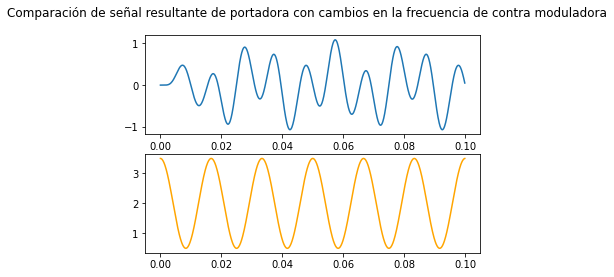

In [ ]:
cutoff_dfreq = 100
md_dfreq = butter_lowpass_filter(sc_dfreq, cutoff, fs, order)

fig, (ax1, ax2) = plt.subplots(2,1)
fig.suptitle('Comparación de señal resultante de portadora con cambios en la frecuencia de contra moduladora')
ax1.plot(t,md_dfreq)
ax2.plot(t,m,color='orange')

Ahora, se pocede a realizar la desmodulacion utilizando una señal portadora para desmodulacion con cambios en la fase con respecto a la señal portadora usada para la modulacion.

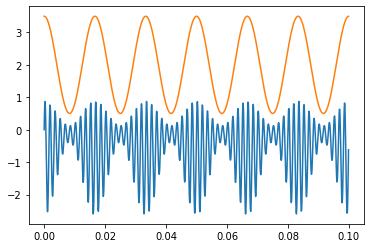

In [ ]:
sc_dtheta = DemAMSC(s_2,c_DesMod_dtheta,m)

Nuevamente, se aplica un filtro pasabajas con frecuencia de corte de 100 Hz y se observan los resultados y cambios producto de una señal portadora con cambios en la fase.

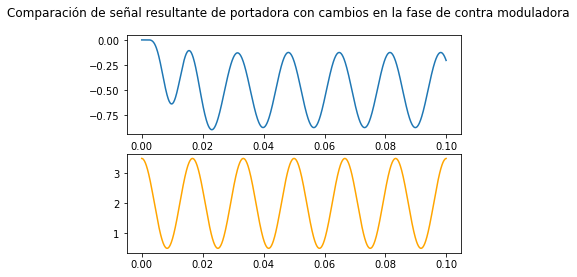

In [ ]:
cutoff_dfreq = 100
md_dfreq = butter_lowpass_filter(sc_dtheta, cutoff, fs, order)

fig, (ax1, ax2) = plt.subplots(2,1)
fig.suptitle('Comparación de señal resultante de portadora con cambios en la fase de contra moduladora')
ax1.plot(t,md_dfreq)
ax2.plot(t,m,color='orange')

TAREA #3
Construir un modulador básico AM de tipo DSC-LC, considerando únicamente la etapa de 
modulación: 
1- Se recomienda crear una función para la modulación. 
2- Para el experimento, considere una señal de tono 𝑚(𝑡) ó 𝑓(𝑡) = cos (2𝜋𝑓௠𝑡), de 
forma que SI SE INCURRA en sobre-modulación. 
6- Grafique todas las funciones y salidas involucradas, esto es, 𝑚(𝑡), 𝑐, 𝑠(𝑡), tanto en el 
tiempo como en la frecuencia. Sea ordenado en la forma en que lo presente en la 
notebook. Describa lo que observa en cada una de ellas. 
3- Realice un análisis completo de lo ocurrido en cada parte funcional del sistema de 
modulación AM DSB-SL, basado en las gráficas obtenidas. 
4- Realice un estudio robusto del efecto del factor de modulación 𝜇 = 𝑘௔𝐴௠ durante el 
proceso y en particular en la señal resultante de la modulación, esto es, en la señal 
modulada 𝑠(𝑡), se recomienda la generación y análisis de experimentos para diversos 
valores de 𝜇. 
5- Determine y justifique adecuadamente en que valor de 𝜇 = 𝑘௔𝐴௠ es posible corregir 
de manera óptima el efecto de la sobre-modulación, presente las curvas que 
justifiquen adecuadamente su análisis.

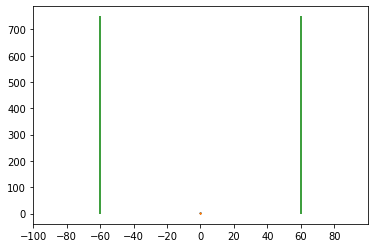

In [ ]:
fm = 60
Am = 1.5
Off = 0
m = cosenoidal(fm,Am,Off)


Mtf, M = plotfft(m,100)


fc = 300
Ac = 1
c = cosenoidal(fc,Ac,0,-pi/2)

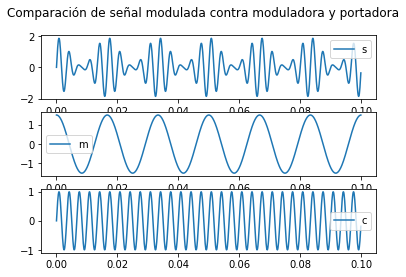

In [ ]:
ka = 0.6

s = (1 + ka*m)*c


fig, (ax1, ax2, ax3) = plt.subplots(3,1)
fig.suptitle('Comparación de señal modulada contra moduladora y portadora')
ax1.plot(t, s)
ax1.legend('s')
ax2.plot(t, m)
ax2.legend('m')
ax3.plot(t, c)
ax3.legend('c')

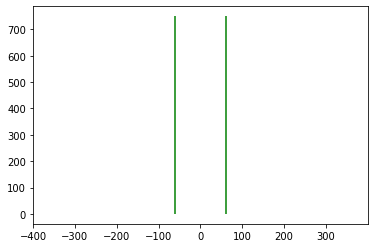

In [ ]:
Mtf, M = plotfft(m,400,100)

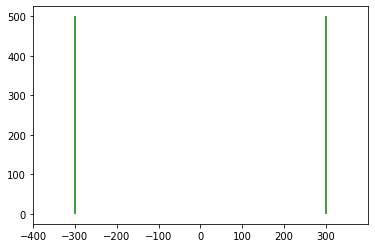

In [ ]:
Ctf, C = plotfft(c,400,100)

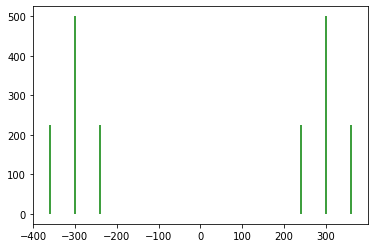

In [ ]:
Stf, S = plotfft(s,400,100)